In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import fpsnippets

df = pd.read_csv('AQEData.csv')

location_pollution = df.groupby(['lat', 'lon'])['tons_per_yr'].sum().reset_index()

location_pollution['neighborhood'] = location_pollution.apply(
    lambda row: fpsnippets.geo_to_neighborhood(row['lat'], row['lon']),
    axis=1
)

neighborhood_avg_pollution = location_pollution.groupby('neighborhood')['tons_per_yr'].mean().reset_index()

df['neighborhood'] = df.apply(
    lambda row: fpsnippets.geo_to_neighborhood(row['lat'], row['lon']),
    axis=1
)
report_counts = df.groupby('neighborhood').size().reset_index(name='num_reports')

neighborhood_stats = neighborhood_avg_pollution.merge(report_counts, on='neighborhood')
neighborhood_stats.columns = ['neighborhood', 'avg_tons_per_yr', 'num_reports']

neighborhood_stats_sorted = neighborhood_stats.sort_values(by='avg_tons_per_yr', ascending=True)

print("Neighborhoods with the lowest average air pollution:")
print(neighborhood_stats_sorted.head(15))

Neighborhoods with the lowest average air pollution:
                neighborhood  avg_tons_per_yr  num_reports
5                    Carrick         3.160000           31
14             Homewood West         3.160000           31
11                    Esplen         5.840000           26
24       Squirrel Hill South         7.630000           31
20        Point Breeze North       118.430000          130
27       Upper Lawrenceville       188.677800          171
12                 Fairywood       304.280000           16
15                   Larimer       534.410000          160
23          South Side Flats      1294.155000           66
17       Lower Lawrenceville      1451.656545          162
4       California-Kirkbride      1981.590000           22
8                    Chateau      2079.330000           14
16  Lincoln-Lemington-Belmar      7444.010000           99
3                  Brookline      9437.223400          233
2                      Bluff     12648.700400          397


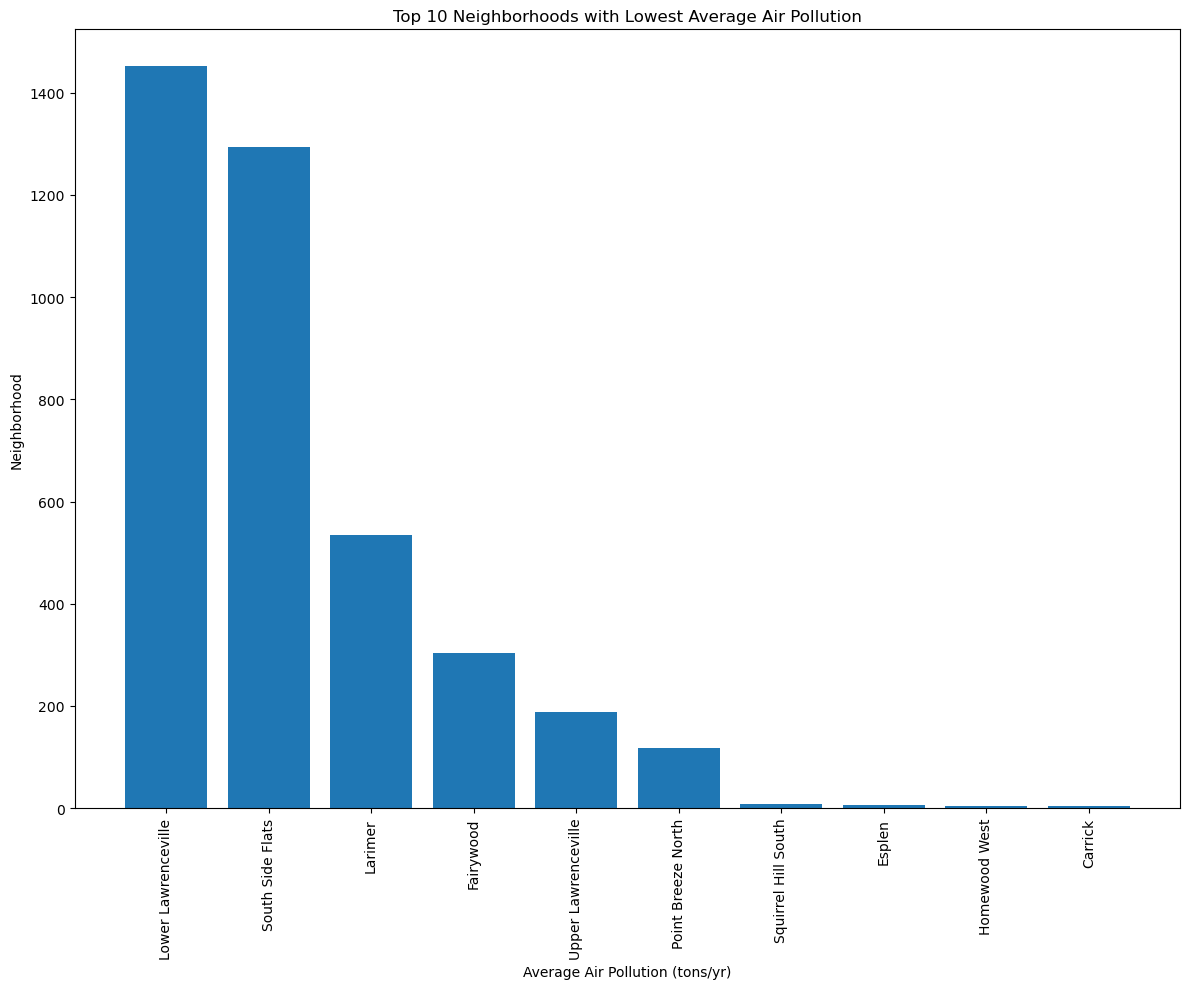

In [5]:
top_15_lowest = neighborhood_stats_sorted.head(10)
plt.figure(figsize=(12, 10))
plt.bar(
    top_15_lowest['neighborhood'].iloc[::-1],
    top_15_lowest['avg_tons_per_yr'].iloc[::-1]
)
plt.xlabel('Average Air Pollution (tons/yr)')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods with Lowest Average Air Pollution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()